#### **Week 7 Assignment Draft**

**Area of FinTech**:  
Company Bankruptcy Prediction

**Dataset researched and located**:  
Kaggle.com : https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

**ML Use Case**:  
we are trying to make a model that predicts the bankruptcy of the startups. 

**ML model selected**:  
Random Forests and decision trees.

**Reason**: 
We choose this model to classify the factors that affects the bankruptcy of the startup companies and then we pass them through multiple decisions to train them and make predictions based on them.

**Group Name Finyouth: 

**Group Members**: 
1. Zainab Aldagdoug.
2. Nouf Almekawed.
3. Afnan Albaqami.
4. Khaloud Huraib.
5. Reem Alrashidy.


**Objective 1 & 2:**

In [1]:
# importing the packages needed
import pandas as pd
import numpy as np
import pydot as py
import graphviz
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Reading the data colledcted
df = pd.read_csv('data.csv')
data= df[['Bankrupt?',' Net Income to Total Assets', ' Working Capital/Equity', ' Cash/Current Liability', 
          ' Net worth/Assets', ' Debt ratio %',' Cash/Total Assets', ' Total Asset Turnover',
          ' ROA(B) before interest and depreciation after tax']]

In [3]:
# Viewing the data
pd.set_option('display.max_columns',None)
data.head()

,Bankrupt?,Net Income to Total Assets,Working Capital/Equity,Cash/Current Liability,Net worth/Assets,Debt ratio %,Cash/Total Assets,Total Asset Turnover,ROA(B) before interest and depreciation after tax
0,1,0.716845,0.721275,1.473360e-04,0.792424,0.207576,0.004094,0.086957,0.405750
1,1,0.795297,0.731975,1.383910e-03,0.828824,0.171176,0.014948,0.064468,0.516730
2,1,0.774670,0.742729,5.340000e+09,0.792484,0.207516,0.000991,0.014993,0.472295
3,1,0.739555,0.729825,1.010646e-03,0.848535,0.151465,0.018851,0.089955,0.457733
4,1,0.795016,0.732000,6.804636e-04,0.893491,0.106509,0.014161,0.175412,0.522298


In [4]:
# colunmes and rows count
data.shape

(6819, 9)

In [5]:
# Some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bankrupt?                                           6819 non-null   int64  
 1    Net Income to Total Assets                         6819 non-null   float64
 2    Working Capital/Equity                             6819 non-null   float64
 3    Cash/Current Liability                             6819 non-null   float64
 4    Net worth/Assets                                   6819 non-null   float64
 5    Debt ratio %                                       6819 non-null   float64
 6    Cash/Total Assets                                  6819 non-null   float64
 7    Total Asset Turnover                               6819 non-null   float64
 8    ROA(B) before interest and depreciation after tax  6819 non-null   float64
dty

In [6]:
# Tell about nulls if any 
data.isnull().any()

Bankrupt?                                             False
 Net Income to Total Assets                           False
 Working Capital/Equity                               False
 Cash/Current Liability                               False
 Net worth/Assets                                     False
 Debt ratio %                                         False
 Cash/Total Assets                                    False
 Total Asset Turnover                                 False
 ROA(B) before interest and depreciation after tax    False
dtype: bool

In [7]:
#The function has returned the count of all unique values in the given index.
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

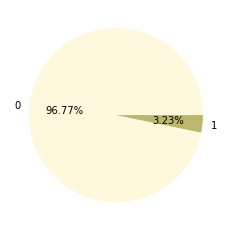

In [8]:
# We take our result from "value_counts()" function then convert it to percentage and draw it  in pie charts
# "Pie()" function to draw pie charts.

dc=data['Bankrupt?'].value_counts()
mycolors = ["Cornsilk","DarkKhaki"]
plt.pie(dc,autopct= '%4.2f%%',labels=dc.index, colors = mycolors)
plt.show()

In [9]:
#Identify and create nominal categorical labels

pd.get_dummies(['Bankrupt?',' Net Income to Total Assets', ' Working Capital/Equity', ' Cash/Current Liability', 
          ' Net worth/Assets', ' Debt ratio %',' Cash/Total Assets', ' Total Asset Turnover',
           ' ROA(B) before interest and depreciation after tax'])

,Cash/Current Liability,Cash/Total Assets,Debt ratio %,Net Income to Total Assets,Net worth/Assets,ROA(B) before interest and depreciation after tax,Total Asset Turnover,Working Capital/Equity,Bankrupt?
0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

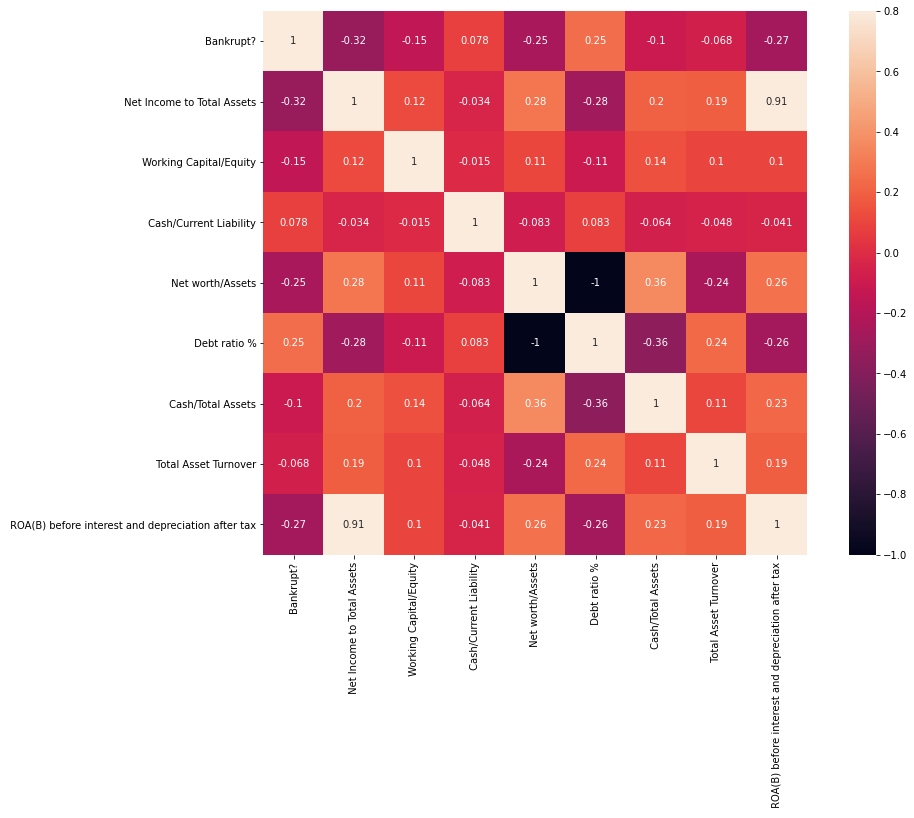

In [10]:
#Find the correlation betweeen the variables 

corr = data.corr() 

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

**Objective 3,4 & 5:**

In [11]:
#Building  Random Forest Classifier
#Defining dependent and independent variables
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',random_state = 0)
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)
print("___________________________________________________")

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)

print('accuracy score = ',accuracy_score(y_test,y_pred))

print("___________________________________________________")


print("Classification Report",classification_report(y_test,y_pred))

print("___________________________________________________")


confusion matrix:
 [[1308   10]
 [  37    9]]
___________________________________________________
accuracy score =  0.9655425219941349
___________________________________________________
Classification Report               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.47      0.20      0.28        46

    accuracy                           0.97      1364
   macro avg       0.72      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364

___________________________________________________


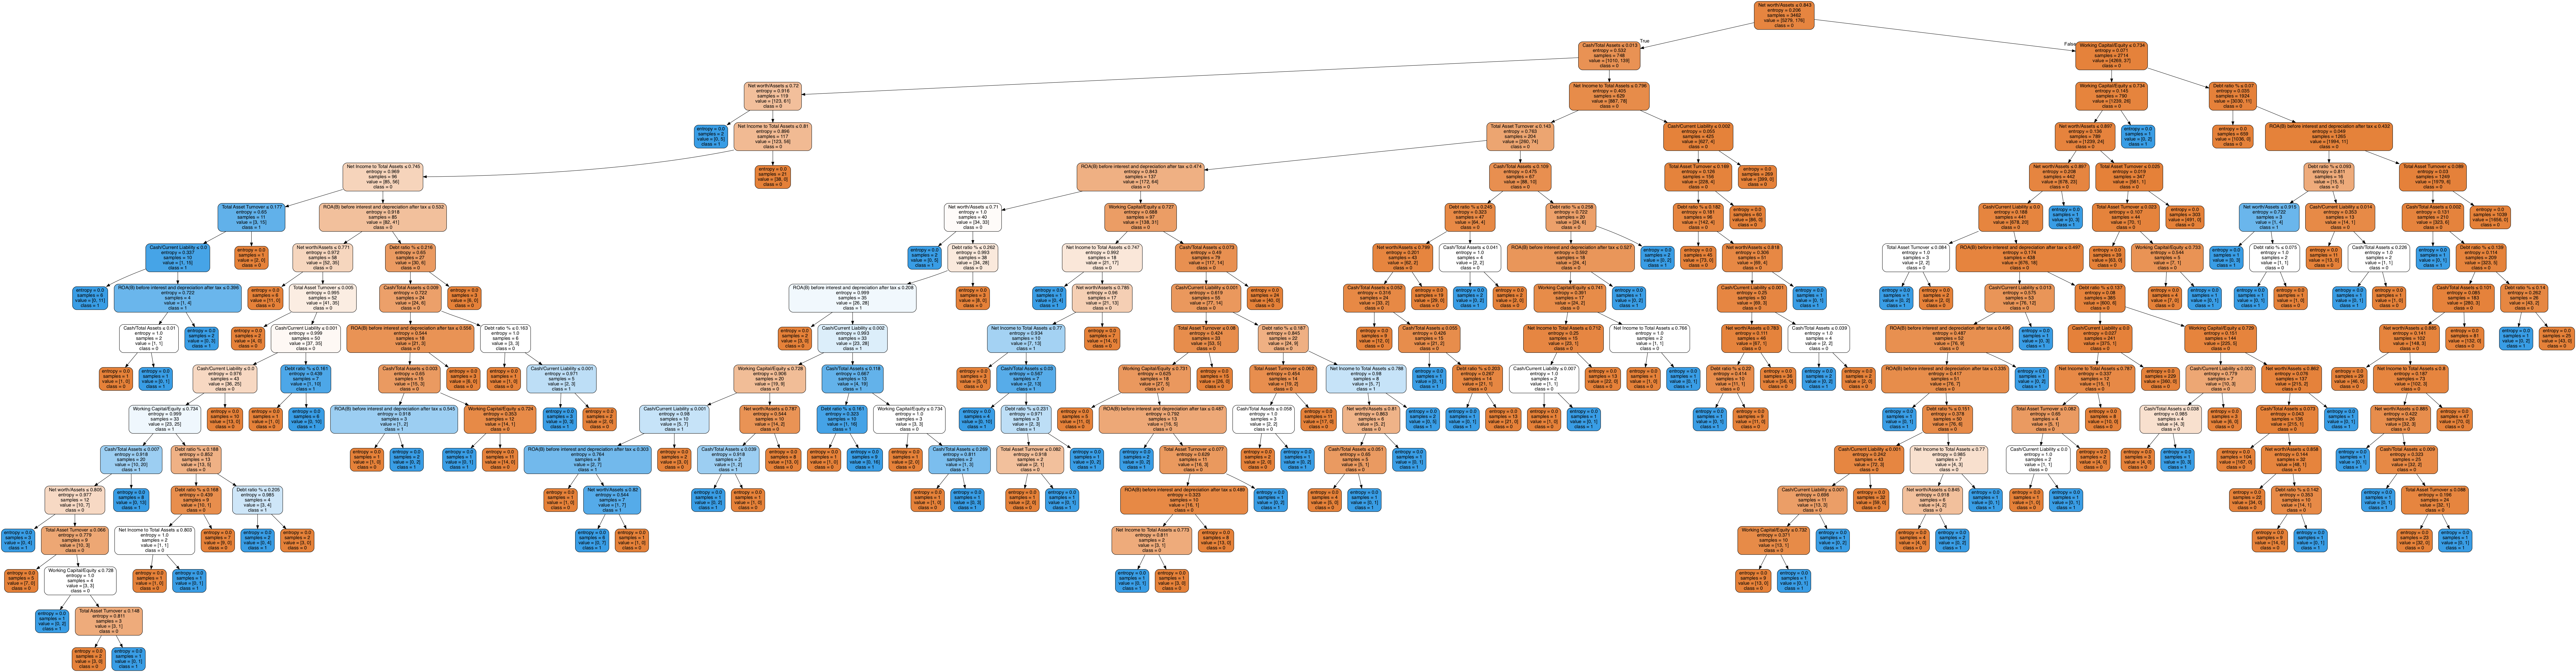

In [14]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#Visualize graph
model_columns=x_train.columns
model_columns
estimator = rf.estimators_[5]


dot_data = StringIO()
export_graphviz(estimator, out_file= dot_data ,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = model_columns,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('RandomForestClassifer_bankruptcy_entropy.png')
Image(graph.create_png())

In [15]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
x, y, = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

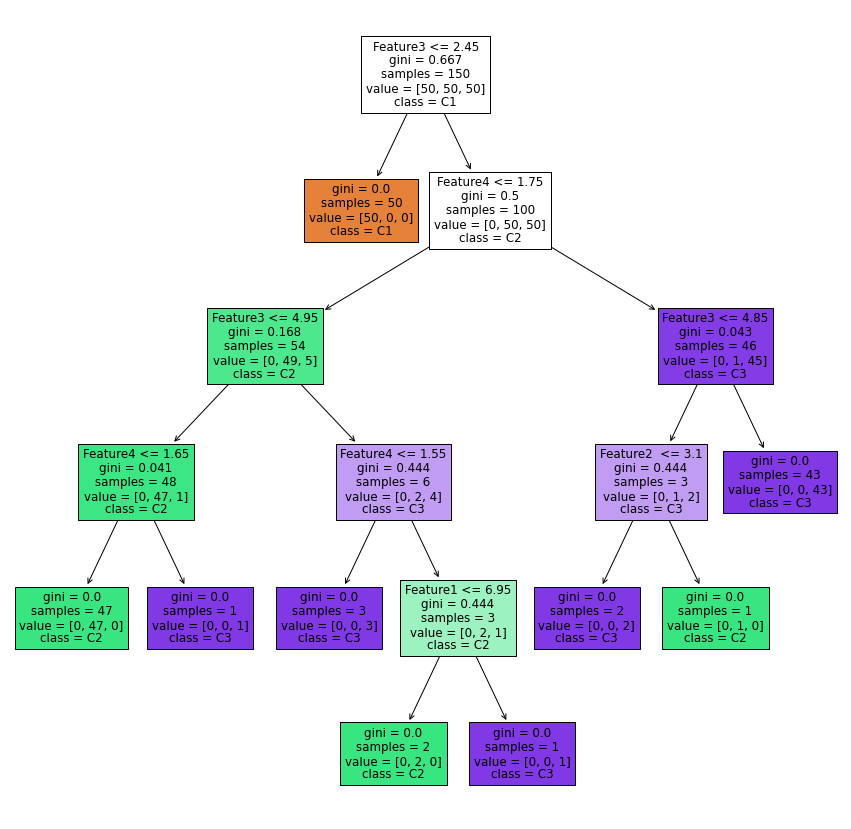

In [16]:
# Plotting
# Number of Instances: 150 (50 in each of three classes)
plt.figure(figsize=(15,15))
F = ["Feature1" ,"Feature2 ", "Feature3", "Feature4","Feature5 ", "Feature6", "Feature7" ,"Feature8"]
S = ["C1", "C2", "C3"]
tree.plot_tree(clf,feature_names = F, class_names = S,filled = True)
plt.show()

#### **CONCLUSIONS**

**RandomForest has the best accuracy of >=97%**

THESE ARE THE VARIABLES RETAINED IN OUR RANDOM FOREST OR THE MOST IMPORTANT FEAUTURES:
  1. Net Income to Total Assets
  2. Working Capital/Equity
  3. Cash/Current Liability
  4. Net worth/Assets
  5. Debt ratio %
  6. Cash/Total Assets
  7. Total Asset Turnover
  8. ROA(A) before interest and % after tax

    
In-conclusion these are the markers or base Feautures that any company must pay more attention to, to insure that they do not end up in Bankruptcy.